
## Projet : Prédiction du Scoring de Crédit et le taux de solvabilité

### Introduction
Ce projet vise à développer un modèle de prédiction du scoring de crédit en utilisant un ensemble de données comprenant 52 caractéristiques pertinentes pour évaluer la solvabilité des emprunteurs. L'objectif principal est de construire un modèle de machine learning capable de classer les emprunteurs en différentes catégories de crédit (par exemple, bon crédit ou mauvais crédit) en se basant sur les caractéristiques financières et personnelles disponibles.

### Présentation des Bibliothèques Python Utilisées
- Pour ce projet, nous avons utilisé plusieurs bibliothèques Python essentielles pour la manipulation des données, le prétraitement, la modélisation et l'évaluation des performances. Voici les principales bibliothèques que nous avons utilisées :
  - **seaborn**
  - **matplotlib.pyplot**
   - **numpy**
  - **pandas** : Cette bibliothèque a été utilisée pour la manipulation des données, le chargement du jeu de données à partir d'un fichier CSV et la création de DataFrames pour l'analyse.
  - **sklearn (scikit-learn)** : Cette bibliothèque est une ressource inestimable pour la modélisation de machine learning. Nous avons utilisé scikit-learn pour diviser les données en ensembles d'entraînement et de test, appliquer différents algorithmes de classification et évaluer la performance des modèles à l'aide de diverses métriques.
Ce projet repose sur l'utilisation de ces bibliothèques pour effectuer un prétraitement des données, entraîner des modèles de classification et analyser les résultats. L'objectif final est de contribuer à la prise de décision dans le domaine de la gestion du crédit en identifiant les emprunteurs à risque.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [23]:
cred=pd.read_csv('loan.csv')

C:\Users\kouas\AppData\Local\Temp\ipykernel_8156\871231434.py:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  cred=pd.read_csv('loan.csv')


In [24]:
cred.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Les colonnes pertinents 

In [25]:
colonnes_a_supprimer = [
    "desc", "url", "mths_since_last_delinq", "mths_since_last_record",
    "next_pymnt_d", "mths_since_last_major_derog", "annual_inc_joint", "dti_joint",
    "verification_status_joint", "open_acc_6m", "open_il_6m", "open_il_12m",
    "open_il_24m", "mths_since_rcnt_il", "total_bal_il", "il_util", "open_rv_12m",
    "open_rv_24m", "max_bal_bc", "all_util", "total_rev_hi_lim", "inq_fi",
    "total_cu_tl", "inq_last_12m"
]
df = cred.drop(columns=colonnes_a_supprimer)

In [26]:
data=df.dropna()
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal
42535,10149342,12000897,27050.0,27050.0,27050.0,36 months,10.99,885.46,B,B2,...,0.0,Jan-2016,885.46,Dec-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,114834.0
42536,10159584,12011200,9750.0,9750.0,9750.0,36 months,13.98,333.14,C,C1,...,0.0,Jan-2016,333.14,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,14123.0
42537,10159498,1319523,12000.0,12000.0,12000.0,36 months,6.62,368.45,A,A2,...,0.0,Jan-2016,368.45,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,267646.0


### Analyse exploratoire des données de prêts - Tendances clés
Visualisation des tendances de montant, taux d'intérêt, âge et comptes ouverts

Interprétation : Cette visualisation en quatre parties offre un aperçu des tendances clés dans les données de prêts.

C:\Users\kouas\AppData\Local\Temp\ipykernel_8156\1819211830.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['issue_year'] = pd.to_datetime(data['issue_d']).dt.year
C:\Users\kouas\AppData\Local\Temp\ipykernel_8156\1819211830.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['issue_year'] = pd.to_datetime(data['issue_d']).dt.year
C:\Users\kouas\AppData\Local\Temp\ipykernel_8156\1819211830.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

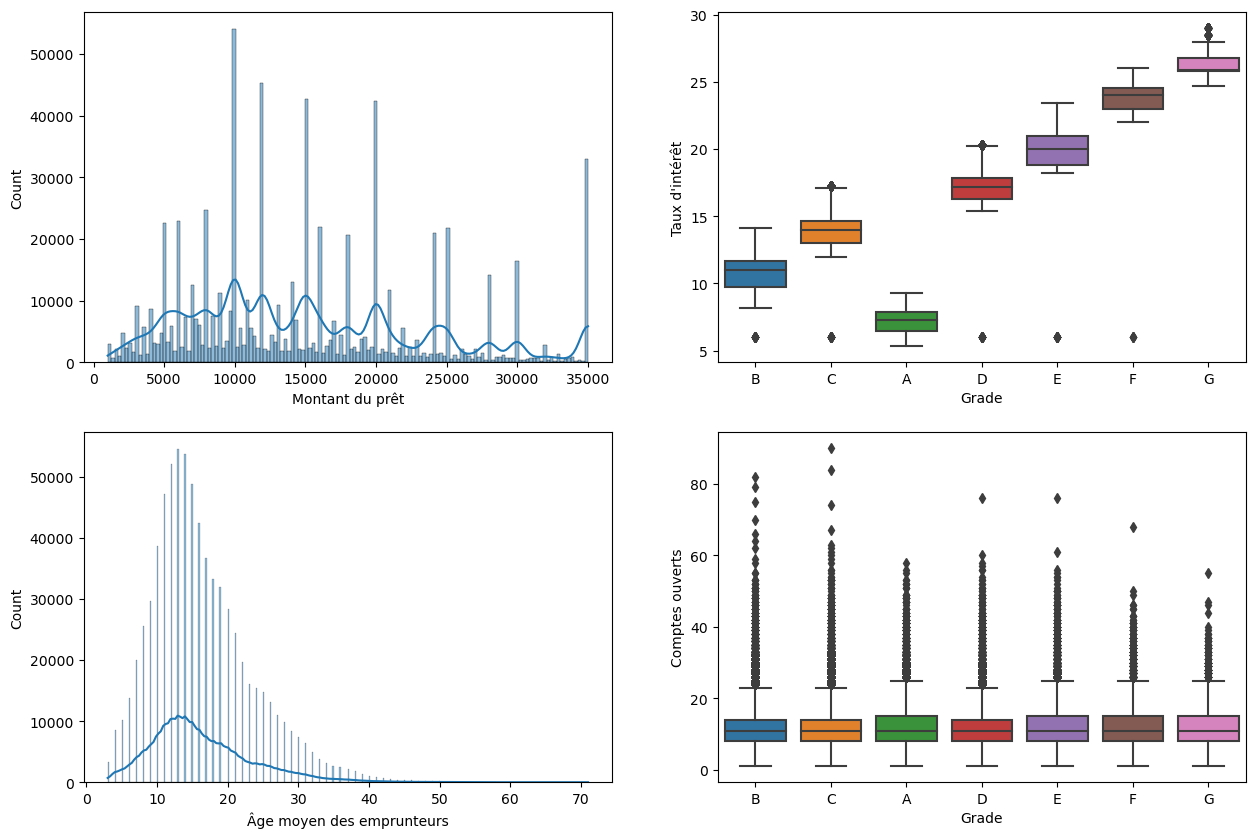

In [6]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
sns.histplot(data=data, x='loan_amnt', kde=True)
plt.xlabel('Montant du prêt')
plt.subplot(222)
sns.boxplot(data=data, x='grade', y='int_rate')
plt.xlabel('Grade')
plt.ylabel('Taux d\'intérêt')
plt.subplot(223)
data['issue_year'] = pd.to_datetime(data['issue_d']).dt.year
data['age'] = data['issue_year'] - data['earliest_cr_line'].str[-4:].astype(int)
sns.histplot(data=data, x='age', kde=True)
plt.xlabel('Âge moyen des emprunteurs')
plt.subplot(224)
sns.boxplot(data=data, x='grade', y='open_acc')
plt.xlabel('Grade')
plt.ylabel('Comptes ouverts')
plt.show()

Le premier graphique (en haut à gauche) montre la distribution des montants de prêt, mettant en évidence une concentration autour de certaines valeurs spécifiques. La présence d'une courbe KDE (Kernel Density Estimation) permet de voir la densité de prêts à différentes valeurs.

Le deuxième graphique (en haut à droite) est une boîte à moustaches qui examine la relation entre le grade des emprunteurs et le taux d'intérêt. On peut observer que les taux d'intérêt sont généralement plus élevés pour les emprunteurs ayant un grade inférieur.

Le troisième graphique (en bas à gauche) présente l'âge moyen des emprunteurs, calculé à partir de l'année d'émission du prêt et de l'année de la première ouverture de crédit. Il montre une distribution des âges avec une certaine tendance.

Le quatrième graphique (en bas à droite) examine la relation entre le grade des emprunteurs et le nombre de comptes ouverts. Il montre que les emprunteurs avec des notes de crédit plus élevées ont tendance à avoir un nombre plus élevé de comptes ouverts.

Ces visualisations fournissent un aperçu des tendances de base dans les données de prêts, ce qui peut être utile pour une analyse plus approfondie et pour orienter les décisions dans le domaine du crédit.

###  Heatmap - Relation entre la propriété du logement et la vérification du statut

 Représentation visuelle de la relation entre la propriété du logement des emprunteurs et la vérification du statut

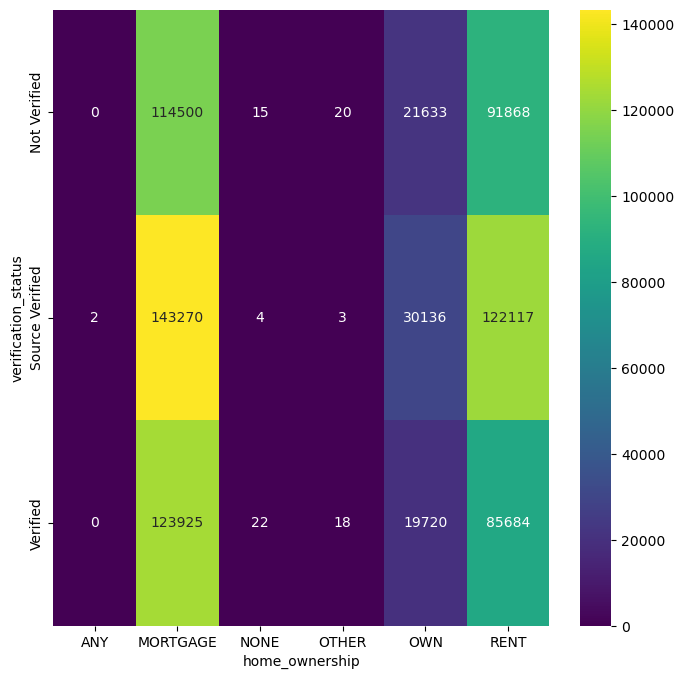

In [7]:
def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
    plt.subplots(figsize=(8 * figscale, 8 * figscale))
    df_pivot = df.pivot_table(index=y_colname, columns=x_colname, aggfunc='size', fill_value=0)
    sns.heatmap(df_pivot, cmap=mpl_palette_name, annot=True, fmt='d')
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    plt.show()
# Utilisez votre fonction pour créer le heatmap
heatmap(data, 'home_ownership', 'verification_status')


Interprétation : Le heatmap ci-dessus illustre la relation entre la propriété du logement des emprunteurs (colonne 'home_ownership') et le statut de vérification de leurs informations (colonne 'verification_status'). Les couleurs dans la heatmap indiquent la fréquence de chaque combinaison de ces deux variables.

Sur l'axe des x, nous avons les catégories de la colonne 'home_ownership', qui représentent différents types de propriété du logement (par exemple, propriétaire, locataire, etc.).



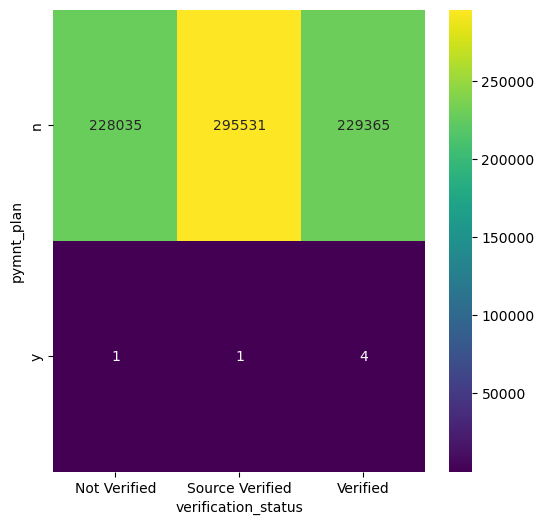

In [8]:

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
    plt.subplots(figsize=(6 * figscale, 6 * figscale))
    
    # Pivot table to prepare data for heatmap
    df_pivot = df.pivot_table(index=y_colname, columns=x_colname, aggfunc='size', fill_value=0)
    
    # Create the heatmap using Seaborn
    sns.heatmap(df_pivot, cmap=mpl_palette_name, annot=True, fmt='d')
    
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    plt.show()

# Utilisez votre fonction pour créer le heatmap
heatmap(data, 'verification_status', 'pymnt_plan')


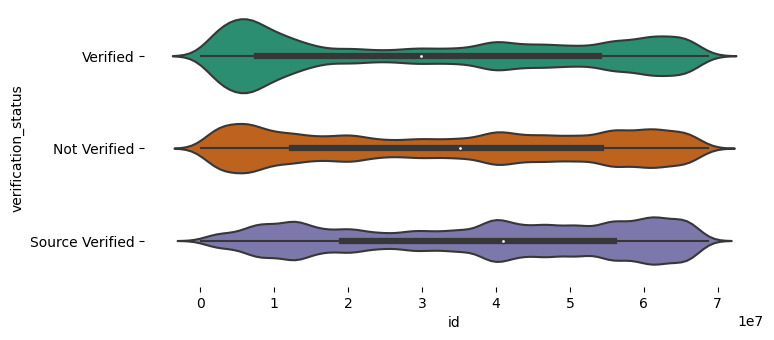

In [9]:
def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
    figsize = (8 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
    plt.figure(figsize=figsize)
    
    # Create the violin plot using Seaborn
    sns.violinplot(data=df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
    sns.despine(top=True, right=True, bottom=True, left=True)
    plt.show()

# Utilisez votre fonction pour créer le violin plot
violin_plot(data, 'id', 'verification_status', inner='box')


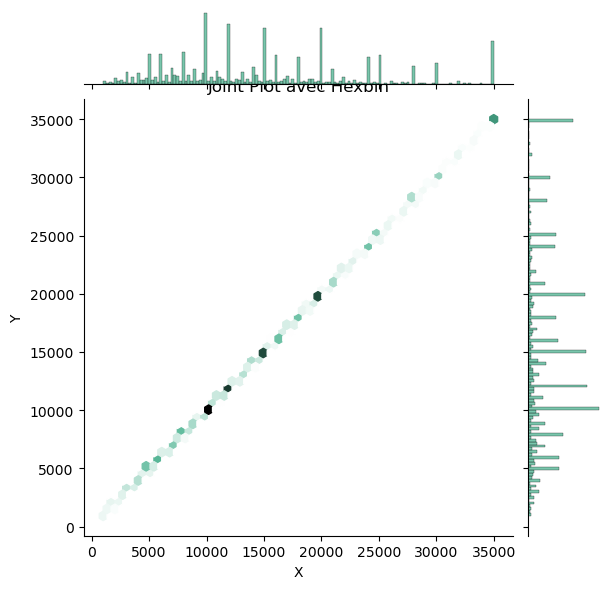

In [10]:
np.random.seed(11)
x, y = data['loan_amnt'], data['funded_amnt_inv']

sns.jointplot(x=x, y=y, kind="hex", color="#4CB391").set_axis_labels('X', 'Y')
plt.title('Joint Plot avec Hexbin')
plt.show()

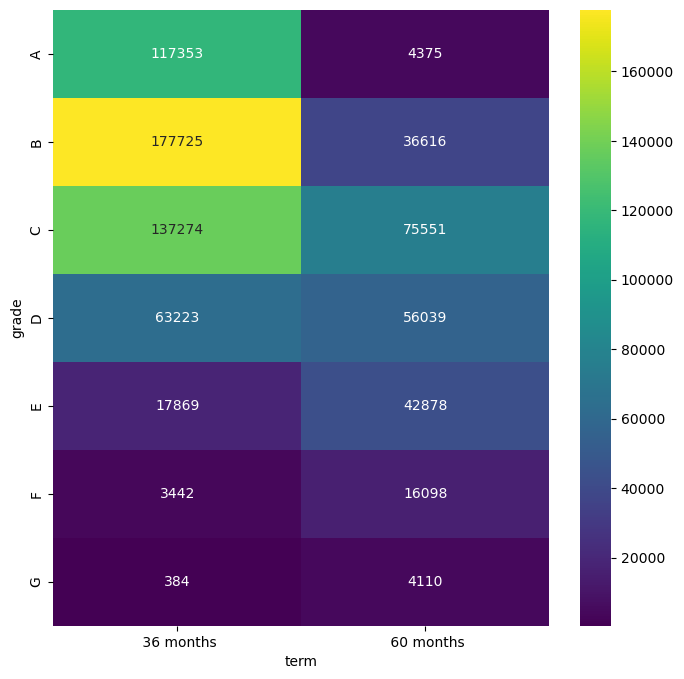

In [11]:
def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
    plt.figure(figsize=(8 * figscale, 8 * figscale))
    df_pivot = df.pivot_table(index=y_colname, columns=x_colname, aggfunc='size', fill_value=0)
    sns.heatmap(df_pivot, cmap=mpl_palette_name, annot=True, fmt='d')
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    plt.show()
heatmap(data, 'term', 'grade')


### Taux de Solvabilité par Sous-Grade et Probabilités de Défaut par Grade

In [12]:
# Calcul des taux de solvabilité par sous-grade
solvency_rates = data.groupby('sub_grade')['loan_status'].value_counts(normalize=True).unstack().fillna(0)
solvency_rates['solvency_rate'] = solvency_rates['Fully Paid'] * 100
default_probabilities = data.groupby('grade')['loan_status'].value_counts(normalize=True).unstack().fillna(0)
default_probabilities['default_probability'] = default_probabilities['Charged Off'] * 100
solvency_table = solvency_rates[['solvency_rate']].style.background_gradient(cmap='YlGnBu', subset=['solvency_rate'])
default_table = default_probabilities[['default_probability']].style.background_gradient(cmap='YlOrRd', subset=['default_probability'])
print("Taux de solvabilité par sous-grade :")
solvency_table
print("\nProbabilités de défaut par grade :")
default_table

Taux de solvabilité par sous-grade :

Probabilités de défaut par grade :


loan_status,default_probability
grade,
A,1.121353
B,2.880457
C,4.397510
D,6.533514
E,7.697499
F,11.422723
G,13.039608


Analyse des taux de solvabilité par sous-grade et des probabilités de défaut par grade

Interprétation : Cette analyse examine les taux de solvabilité par sous-grade et les probabilités de défaut par grade, fournissant des informations essentielles pour évaluer le risque de crédit et la qualité des emprunteurs.

### Probabilités de Défaut par Sous-Grade

In [13]:

def default_probability(sub_grade):
    sub_grade_data = data[data['sub_grade'] == sub_grade]
    default_count = len(sub_grade_data[sub_grade_data['loan_status'] == 'Charged Off'])
    total_loans = len(sub_grade_data)
    return (default_count / total_loans) * 100
sub_grade_probabilities = pd.DataFrame(data['sub_grade'].unique(), columns=['sub_grade'])
sub_grade_probabilities['default_probability'] = sub_grade_probabilities['sub_grade'].apply(default_probability)
sub_grade_probabilities = sub_grade_probabilities.sort_values(by='default_probability', ascending=False)
styled_sub_grade_probabilities = sub_grade_probabilities.style.background_gradient(cmap='YlOrRd', subset=['default_probability'])
styled_sub_grade_probabilities


,sub_grade,default_probability
31,G5,14.988814
30,F5,14.850136
27,G1,13.989637
26,G3,13.422007
29,F4,13.098931
33,F3,12.810354
34,G2,12.197232
28,F2,10.497359
32,G4,9.807692
23,E5,9.342008


Analyse des probabilités de défaut pour chaque sous-grade

Interprétation : Cette analyse examine les probabilités de défaut pour chaque sous-grade de crédit. Les probabilités de défaut fournissent des informations importantes pour évaluer le risque associé à chaque catégorie de sous-grade.

### SCORING

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Diviser les données en fonctionnalités (X) et la variable cible (y)
X = data.drop('loan_status', axis=1)  # Assurez-vous que 'loan_status' est la colonne cible
y = data['loan_status']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
label_encoders={}
for colunm in data:
    le=LabelEncoder()
    data[colunm]=le.fit_transform(data[colunm])
    label_encoders[colunm]=le

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Régression logistique
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Régression logistique - Accuracy:", logistic_accuracy)
print(classification_report(y_test, logistic_predictions))

C:\Users\kouas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Régression logistique - Accuracy: 0.9633127030927653


C:\Users\kouas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      9758
           1       0.96      0.99      0.98    166354
           2       0.00      0.00      0.00       313
           3       0.97      0.99      0.98     43806
           4       0.00      0.00      0.00      1715
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00       633
           7       0.04      0.00      0.00      3287

    accuracy                           0.96    225882
   macro avg       0.36      0.36      0.36    225882
weighted avg       0.94      0.96      0.95    225882



C:\Users\kouas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kouas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Prévision des Remboursements : Le modèle est  capable de prédire avec précision les cas de remboursement complet (classe 1), avec une précision de 96% et un rappel de 99%. Le modèle est efficace pour identifier les emprunteurs susceptibles de rembourser intégralement leurs prêts.

Prévision de Défaut : Le modèle a également de bonnes performances pour prédire les cas de défaut (classe 0) et de remboursement complet (classe 3) avec des précisions de 93% et 97% respectivement. Cela permet d'identifier les emprunteurs à faible risque de défaut.

Optimisation des Prêts : Le modèle peut aider à optimiser la sélection des prêts en fonction du risque estimé. Vous pouvez ajuster les critères d'approbation en fonction des prédictions du modèle pour minimiser le risque de non-remboursement.